# Project 2: Investigate a Dataset

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The chosen dataset for this project is <b>no-show appointments dataset</b>. The explanation for each variable in the dataset can be found on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments). This project aims to determine the characteristics about the patient that are correlated with the no-show rate. To meet the aim of this project, the following questions are explored.

<ul>
<li>Do patients that make appointments much earlier tend to show up less often?</li>
<li>Do patients that receive SMS reminder(s) tend to show up more often?</li>
<li>Which gender shows up more often?</li>
<li>Does age affect no-show rate?</li>
<li>Does scholarship affect no-show rate?</li>
</ul>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
% matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check if there is any missing values and if each variable has the correct data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Findings

<ul>
<li>Column labels do not have consistent naming convention.</li>    
<li>Only 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship', 'SMS_received', 'No-show' variables are needed for the analysis.</li>
<li>'ScheduledDay', 'AppointmentDay' variables have wrong data types. Both variables should be converted from string to datetime.</li>
<li>There aren't any missing values as each variable has 110527 values.</li>
<li>The minimum patient age is -1.</li>
</ul>

### Data Cleaning

>Data are cleaned based on the findings.

<ul>
<li>All column labels are changed into lowercase letter and will be separated by '_' when necessary</li>    
<li>Only 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship', 'SMS_received', 'No-show' variables are extracted from the data frame.</li>
<li>Data types of 'ScheduledDay' and 'AppointmentDay' are converted from string to datetime.</li>
<li>The row with patient's age of -1 is dropped since there is only one such case</li>
</ul>

In [5]:
# Check if there are any duplicated rows
print(sum(df.duplicated()))

0


In [6]:
# Extract columns which are needed for analysis from the data frame

columns_keep = ['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship', 'SMS_received', 'No-show']
df = df[columns_keep]
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,No


In [7]:
# Clean column labels

# Add '_' before second capital letter
df.rename(columns={'ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day'}, inplace=True)

# Convert '-' in "No-show" into '_'
df.rename(columns={'No-show':'No_show'}, inplace=True)

# Convert all uppercase letters into lowercase letters
df.rename(columns=lambda x: x.lower(), inplace=True)

# Print out a few lines to verify the changes
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,No


In [8]:
# Convert data types of 'scheduled_day' and 'appointment_day' variables from string to datetime.

df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

# Confirm data types of 'scheduled_day' and 'appointment_day' variables are datetime. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
scholarship        110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.9+ MB


In [9]:
# Remove the row with patient's age of -1
df.query('age > -1', inplace=True)

### Appending Data
> A new column, which contains the difference in days between 'appointment_day' and 'schdeduled_day', is added to the data frame. The new column is required for exploratory data analysis

In [10]:
# Remove timestamp from scheduled_day because only difference in days is needed for the analysis
scheduled_day_wo_time = pd.to_datetime(df['scheduled_day'].dt.normalize())

# Calculate the number of days between appointment_day and scheduled_day and store it as int
df['diff_day'] = (df['appointment_day'] - scheduled_day_wo_time).dt.days

# Print out a few lines to verify the changes
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,sms_received,no_show,diff_day
0,F,2016-04-29 18:38:08,2016-04-29,62,0,0,No,0
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,No,0
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,No,0
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,No,0
4,F,2016-04-29 16:07:23,2016-04-29,56,0,0,No,0


In [11]:
# There are 5 rows whose diff_day are negative
df.query('diff_day < 0')

,gender,scheduled_day,appointment_day,age,scholarship,sms_received,no_show,diff_day
27033,M,2016-05-10 10:51:53,2016-05-09,38,0,0,Yes,-1
55226,F,2016-05-18 14:50:41,2016-05-17,19,0,0,Yes,-1
64175,F,2016-05-05 13:43:58,2016-05-04,22,0,0,Yes,-1
71533,F,2016-05-11 13:49:20,2016-05-05,81,0,0,Yes,-6
72362,M,2016-05-04 06:50:57,2016-05-03,7,0,0,Yes,-1


In [12]:
# Drop all the rows with negative diff_day because diff_day must have positive values and there are only 5 such cases
df.query('diff_day >= 0', inplace=True)

In [13]:
# Verify that data is cleaned and new data is added correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 8 columns):
gender             110521 non-null object
scheduled_day      110521 non-null datetime64[ns]
appointment_day    110521 non-null datetime64[ns]
age                110521 non-null int64
scholarship        110521 non-null int64
sms_received       110521 non-null int64
no_show            110521 non-null object
diff_day           110521 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 7.6+ MB


In [14]:
df.describe()

,age,scholarship,sms_received,diff_day
count,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.321043,10.184345
std,23.109885,0.297682,0.466879,15.255153
min,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,179.000000


### Data Wrangling: Conclusion

After cleaning the data and adding new data, df.info() and df.describe() are used to verify the correctness of data cleaning process. From the output of df.info(), it can be observed that the unused columns of dataframe are removed successfully, and 
new data is added correctly. Futhermore, column labels have consistent naming convention, and all the variables have the correct data types. By observing the output of df.describe(), the rows with negative age and negative difference in days are dropped successfully.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Do patients that make appointments much earlier (in days) tend to show up less often?

In [15]:
# Determine the unique values in 'no_show' column
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# Determine the rows that correspond to "Yes" and "No" in 'no_show' column
no_show = df.no_show == "Yes"
show_up = df.no_show == "No"

In [17]:
# Compute the average number of days between appointment day and schedule day for patients who showed up.
df.diff_day[show_up].mean()

8.754758692620767

In [18]:
# Compute the average number of days between appointment day and schedule day for patients who didn't show up.
df.diff_day[no_show].mean()

15.835484449224701

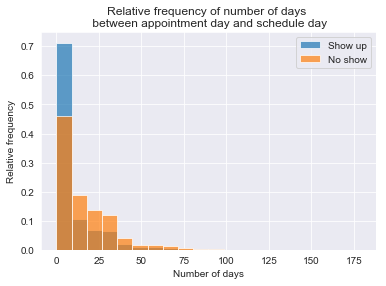

In [19]:
# Plot histograms of number of days between appointment day and schedule day for patients who showed up and didnt show up.
# To allow fair comparision, y-axis of the histograms is relative frequency instead of frequency.
df.diff_day[show_up].hist(alpha=0.7, weights=np.ones(sum(show_up))/sum(show_up), label='Show up', bins=20)
df.diff_day[no_show].hist(alpha=0.7, weights=np.ones(sum(no_show))/sum(no_show), label='No show', bins=20);

# Title and labels
plt.title('Relative frequency of number of days \n between appointment day and schedule day')
plt.xlabel('Number of days')
plt.ylabel('Relative frequency')

# Legend
plt.legend();

#### Conclusion for Question 1
>Patients that didn't show up make the appointment, on average, 18.5 days before the appointment. For patients who showed up, the average is 8.8 days. The results suggest that patients that make appointments much earlier is more likely to not show up. This relationship is further verified as the histogram for patients that didn't show up skews more to the left as compared to the histogram for patients who showed up.

### Research Question 2: Do patients that receive SMS reminder(s) tend to show up more often?

In [20]:
# Compute the average number of SMS received by patients who showed up.
df.sms_received[show_up].mean()

0.29133742220005215

In [21]:
# Compute the average number of SMS received by patients who didnt showed up
df.sms_received[no_show].mean()

0.43846912252397596

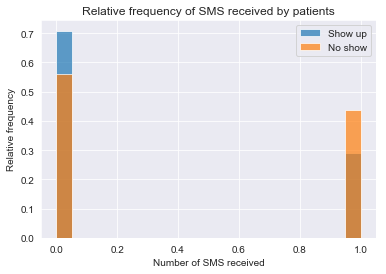

In [22]:
# Plot histograms of number of SMS received by patients who showed up and didnt show up.
# To allow fair comparision, y-axis of the histograms is relative frequency instead of frequency.
df.sms_received[show_up].hist(alpha=0.7, weights=np.ones(sum(show_up))/sum(show_up), label='Show up', bins=20)
df.sms_received[no_show].hist(alpha=0.7, weights=np.ones(sum(no_show))/sum(no_show), label='No show', bins=20);

# Title and labels
plt.title('Relative frequency of SMS received by patients')
plt.xlabel('Number of SMS received')
plt.ylabel('Relative frequency')

# Legend
plt.legend();

#### Conclusion for Question 2
>On average, patients that showed up received less SMS than patients who didn't show up. Histograms are plotted to further study the relationship between SMS_received and no_show. Based on the histograms, for patients who received SMS, the proportion of patients who didn't show up is larger than that of patients who showed up. Thus, sending out SMS to patients doesn't seem to help in reducing no-show rate. 

### Research Question 3: Which gender shows up more often?

In [23]:
# Calculate proportion of show up and no show for each gender
gender_proportion = df.groupby(['gender']).no_show.value_counts(normalize=True)
gender_proportion

gender  no_show
F       No         0.796885
        Yes        0.203115
M       No         0.800362
        Yes        0.199638
Name: no_show, dtype: float64

In [24]:
# Get the proportion of show up and no show for male
male_proportion = gender_proportion['M']

# Get the proportion of show up and no show for female
female_proportion = gender_proportion['F']

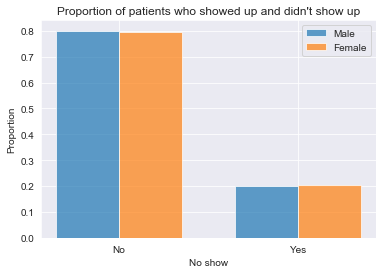

In [25]:
# Plot bars
ind = np.arange(len(male_proportion))  # the x locations for the groups
width = 0.35  # the width of the bars

male_bars = plt.bar(ind, male_proportion, width, alpha=0.7, label='Male')
female_bars = plt.bar(ind + width, female_proportion, width, alpha=0.7, label='Female')

# Title and labels
plt.title("Proportion of patients who showed up and didn't show up")
plt.xlabel('No show')
plt.ylabel('Proportion')

locations = ind + width / 2  # xtick locations
labels = ['No', 'Yes']  # xtick labels
plt.xticks(locations, labels)

# Legend
plt.legend()

#### Conclusion for Question 3
>For both genders, the proportions of patients who showed up and didn't show up are very similar as illustrated in the bar chart above. The proportions of male and female patients who showed up are about 0.800 and 0.797 respectively. Whereas the proportions of male and female patients who didn't show up are about 0.200 and 0.203 respectively. Therefore, both genders have similar no-show rate.

### Research Question 4: Does age affect no-show rate?

In [26]:
# Compute the average age of patients who showed up.
df.age[show_up].mean()

37.790504154999034

In [27]:
# Compute the average age of patients who didn't show up
df.age[no_show].mean()

34.31787218786412

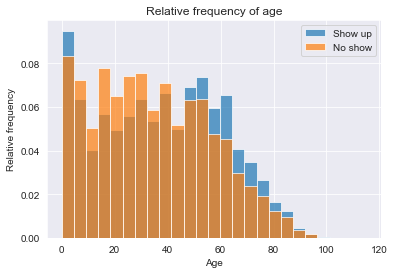

In [28]:
# Plot histograms of age for patients who showed up and didnt show up.
# To allow fair comparision, y-axis of the histograms is relative frequency instead of frequency.
df.age[show_up].hist(alpha=0.7, weights=np.ones(sum(show_up))/sum(show_up), label='Show up', bins=25)
df.age[no_show].hist(alpha=0.7, weights=np.ones(sum(no_show))/sum(no_show), label='No show', bins=25);

# Title and labels
plt.title('Relative frequency of age')
plt.xlabel('Age')
plt.ylabel('Relative frequency')

# Legend
plt.legend();

#### Conclusion for Question 4
>The average age of patients that showed up is around 37.79 years old. For patients who didnt show up, the average age is around 34.32 years old. Based on the histogram of age, older patients tend to show up more often than younger patients, except for very young patients whose ages are somewhere around 1 year old.

### Research Question 5: Does scholarship affect no-show rate?

In [29]:
# Calculate proportion of show up and no show for patients with and without scholarship
scholarship_proportion = df.groupby(['scholarship']).no_show.value_counts(normalize=True)
scholarship_proportion

scholarship  no_show
0            No         0.801967
             Yes        0.198033
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

In [30]:
# Get the porportion of show up and no show for patients without scholarships
no_scholarship_proportion = scholarship_proportion[0]

# Get the porportion of show up and no show for patients with scholarships
with_scholarship_proportion = scholarship_proportion[1]

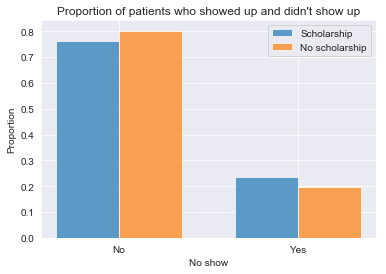

In [31]:
# Plot bars
ind = np.arange(len(no_scholarship_proportion))  # the x locations for the groups
width = 0.35  # the width of the bars

with_scholarship_bars = plt.bar(ind, with_scholarship_proportion, width, alpha=0.7, label='Scholarship')
no_scholarship_bars = plt.bar(ind + width, no_scholarship_proportion, width, alpha=0.7, label='No scholarship')

# Title and labels
plt.title("Proportion of patients who showed up and didn't show up")
plt.xlabel('No show')
plt.ylabel('Proportion')

locations = ind + width / 2  # xtick locations
labels = ['No', 'Yes']  # xtick labels
plt.xticks(locations, labels)

# Legend
plt.legend()

#### Conclusion for Question 5
> As shown in the bar chart, patients without scholarships is slightly more likely to show up than patients with scholarships. The proportion of patients who showed up and had scholarship is about 0.763. The proportion of patients who showed up and didn't have scholarship is about 0.802.

<a id='conclusions'></a>
## Conclusions


<ul>
<li>Patients that make appointments much earlier is more likely to not show up.</li> 
<li>Sending out SMS to patients doesn't seem to help in reducing no-show rate. </li>
<li>Male and female patients have similar no-show rate.</li>    
<li>Older patients tend to show up more often than younger patients, except for very young patients whose ages are somewhere around 1 year old.</li> 
<li>Patients without scholarships is slightly more likely to show up than patients with scholarships.</li>
</ul>

#### Limitations 
<ul>
<li>The rows with invalid values are dropped instead of replacing the invalid values with values such as mean. Invalid values include negative age and negative number of days between appointment day and scheduled day.</li>
<li>The number of females (71836) is much greater than the number of males (38685) in this dataset. Thus, any conclusion that is related to gender may be incorrect.</li>
<li>The dataset contains information from 100k medical appointments in Brazil. Hence, the conclusions may not be applicable for dataset collected in other countries.</li>
</ul>
